In [123]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log
import random

In [12]:
mu1 = 0.1
mu2 = 0.2
sigma1 = 0.2
sigma2 = 0.3
rho = 0.3
r = 0.05

In [13]:
omega = np.linspace(0,1, 101)

In [14]:
mu = mu1 * omega + mu2 * (1 - omega)
sigma = np.sqrt((sigma1 ** 2) * omega ** 2 + (sigma2 ** 2) * (1 - omega) ** 2 + 2 * rho * sigma1 * sigma2 * omega.dot(1 - omega))

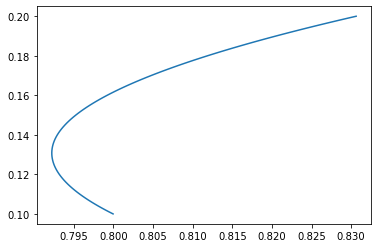

In [15]:
#import plotly.graph_objects as go

#fig = go.Figure(data=go.Scatter(x=sigma, y=mu))
#fig.show()
plt.plot(sigma, mu)
plt.show()

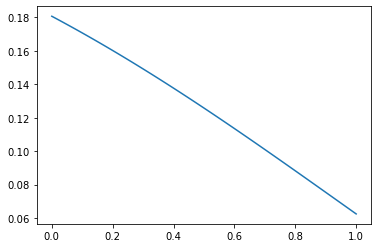

In [16]:
plt.plot(omega, ((mu - r) / sigma))

In [390]:
mu = np.array([
        [0.05], 
        [0.07], 
        [0.15], 
        [0.27],
    ])

sigma = np.array([
        [0.07], 
        [0.12], 
        [0.3], 
        [0.6],
    ])

rho = np.array([   
        [1, 0.8, 0.5, 0.4], 
        [0.8, 1, 0.7, 0.5], 
        [0.5, 0.7, 1, 0.8], 
        [0.4, 0.5, 0.8, 1]
    ])

In [391]:
cov = np.diag(sigma.flatten()) @ rho @ np.diag(sigma.flatten())
I = np.ones(len(mu)).reshape(len(mu), 1)
inv_cov = np.linalg.inv(cov)
A = I.T @ inv_cov @ I
B = I.T @ inv_cov @ mu
C = mu.T @ inv_cov @ mu
min_variance_p = (1 / A) * inv_cov @ I
min_variance_r = B / A
min_variance_vol = np.sqrt (min_variance_p.T @ cov @ min_variance_p)

In [361]:
m = 0.1
omega = (1 / (A * C - B ** 2)) * inv_cov @ ((A * mu - B * I) * m + (C * I - B * mu))
vol = np.sqrt(omega.T @ cov @ omega)

In [362]:
r = 0.025
tangency_p = (1 / (B - A * r)) * inv_cov @ (mu - r * I)
omega_r = (m - r) * inv_cov @ (mu - r * I) / ((mu - r * I).T @ inv_cov @ (mu - r * I))
vol_r = np.sqrt(omega_r.T @ cov @ omega_r)

In [30]:
float(vol)

0.16132773234950296

In [163]:
import scipy.optimize as sco

def portfolio_variance (w):
    return w.T @ cov @ w

def neg_sharpe_ratio(w):
    return (-1) * (w.T @ mu - r) / sqrt (portfolio_variance(w))

def neg_portfolio_return (w):
    return ((-1) * w.T @ mu)

In [23]:
cons = ({'type': 'eq', 'fun': lambda x: x.T @ I - 1})
bnds = tuple((-5, 5) for x in range(len(mu)))
initial_w = np.array(len(mu)*[1./len(mu)])

sco.minimize(portfolio_variance, initial_w, method='SLSQP', bounds=bnds, constraints=cons, tol=1e-15)

     fun: 0.004178085953590705
     jac: array([0.00835617, 0.00835617, 0.00835617, 0.00835617])
 message: 'Optimization terminated successfully'
    nfev: 90
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([ 1.27488666, -0.26311262,  0.01633934, -0.02811338])

In [24]:
cons = ({'type': 'eq', 'fun': lambda x: x.T @ mu - m},
        {'type': 'eq', 'fun': lambda x: x.T @ I - 1})
bnds = tuple((-5, 5) for x in range(len(mu)))
initial_w = np.array(len(mu)*[1./len(mu)])

sco.minimize(portfolio_variance, initial_w, method='SLSQP', bounds=bnds, constraints=cons, tol=1e-15)

     fun: 0.02602663722503283
     jac: array([0.01552534, 0.03013651, 0.08858121, 0.17624826])
 message: 'Optimization terminated successfully'
    nfev: 55
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([0.52841211, 0.17288806, 0.15976436, 0.13893547])

In [366]:
bnds = tuple((-5, 5) for x in range(len(mu)))
initial_w = np.array(len(mu)*[1./len(mu)])

sco.minimize(neg_sharpe_ratio, initial_w, method='SLSQP', bounds=bnds, constraints=cons, tol=1e-15)

     fun: array([-0.46791902])
     jac: array([-0.19420321, -0.19420321, -0.19420319, -0.19420318])
 message: 'Optimization terminated successfully'
    nfev: 88
     nit: 17
    njev: 17
  status: 0
 success: True
       x: array([0.71267118, 0.06526608, 0.12436147, 0.09770128])

In [394]:
cons = ({'type': 'eq', 'fun': lambda x: x.T @ mu - m + (1 - x.T @ I) * r})
bnds = tuple((-5, 5) for x in range(len(mu)))
initial_w = np.array(len(mu)*[1./len(mu)])

sco.minimize(portfolio_variance, initial_w, method='SLSQP', bounds=bnds, constraints=cons, tol=1e-15)

     fun: 0.02569100733597252
     jac: array([0.01712734, 0.03082921, 0.08563669, 0.16784791])
 message: 'Optimization terminated successfully'
    nfev: 111
     nit: 22
    njev: 22
  status: 0
 success: True
       x: array([0.88735247, 0.08126327, 0.15484344, 0.12164861])

In [32]:
cons = ({'type': 'eq', 'fun': lambda x: x.T @ cov @ x - float(vol) ** 2},
        {'type': 'eq', 'fun': lambda x: x.T @ I - 1})
bnds = tuple((-5, 5) for x in range(len(mu)))
initial_w = np.array(len(mu)*[1./len(mu)])

sco.minimize(neg_portfolio_return, initial_w, method='SLSQP', bounds=bnds, constraints=cons, tol=1e-15)

     fun: array([-0.1])
     jac: array([-0.05, -0.07, -0.15, -0.27])
 message: 'Optimization terminated successfully'
    nfev: 85
     nit: 17
    njev: 17
  status: 0
 success: True
       x: array([0.52841208, 0.17288809, 0.15976436, 0.13893546])

In [214]:
np.random.seed()
simulation = 2 * np.random.random(size=(len(mu), 10000)) - 1
simulation = simulation/simulation.sum(axis=0)

In [215]:
sim_vol = []
sim_ret = []
for i in range(simulation.shape[1]):
    weights = simulation[:,i].reshape(len(simulation[:,0]),1)
    sim_vol.append(sqrt(weights.T @ cov @ weights))
    sim_ret.append(float(weights.T @ mu))

In [199]:
target_rets = np.linspace(0, 0.25, 1000)
tvols = []
for tr in target_rets:
    cons = ({'type': 'eq', 'fun': lambda x: x.T @ mu - tr},
            {'type': 'eq', 'fun': lambda x: x.T @ I - 1})
    bnds = tuple((-5, 5) for x in range(len(mu)))
    initial_w = np.array(len(mu)*[1./len(mu)])

    opt_ef = sco.minimize(portfolio_variance, initial_w, method='SLSQP', bounds=bnds, constraints=cons, tol=1e-15)
    tvols.append(sqrt(opt_ef['fun']))

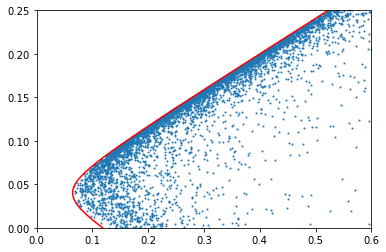

In [220]:
plt.scatter(sim_vol, sim_ret, s=1)
plt.plot(tvols, target_rets, color='red')
plt.xlim(0, 0.6)
plt.ylim(0, 0.25)
plt.show()

In [384]:
def get_tangency_portfolio(mu, sigma, rho, r):
    cov = np.diag(sigma.flatten()) @ rho @ np.diag(sigma.flatten())
    I = np.ones(len(mu)).reshape(len(mu), 1)
    inv_cov = np.linalg.inv(cov)
    A = I.T @ inv_cov @ I
    B = I.T @ inv_cov @ mu
    C = mu.T @ inv_cov @ mu
    tangency_p = (1 / (B - A * r)) * inv_cov @ (mu - r * I)
    return tangency_p

def sharpe_ratio (mu, sigma, rho, r):
    cov = np.diag(sigma.flatten()) @ rho @ np.diag(sigma.flatten())
    omega = get_tangency_portfolio(mu, sigma, rho, r)
    ret = omega.T @ mu
    vol = sqrt(omega.T @ cov @ omega)
    return (ret - r) / vol

In [223]:
tangency_p

array([[0.71267122],
       [0.06526604],
       [0.12436147],
       [0.09770128]])

In [225]:
get_tangency_portfolio(mu, sigma, rho, r)

array([[0.71267122],
       [0.06526604],
       [0.12436147],
       [0.09770128]])

In [379]:
mu = np.array([
        [0.035], 
        [0.1]
    ])

sigma = np.array([
        [0.07], 
        [0.2]
    ])

rho = np.array([   
        [1, -0.4], 
        [-0.4, 1]
    ])

In [326]:
get_tangency_portfolio(mu, sigma, rho, 0.06)

array([[ 1.18181818],
       [-0.18181818]])

In [331]:
rr = np.linspace(-0.05, 0.05, 101)
rel_price = np.zeros(101)
for i, r in enumerate(rr):
    weights = get_tangency_portfolio(mu, sigma, rho, r)
    rel_price[i] = weights[1] - weights[0]

(-5.0, 5.0)

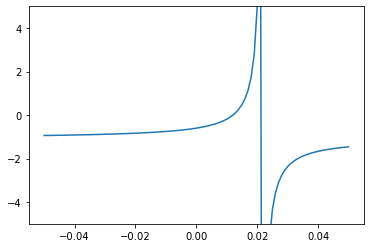

In [337]:
plt.plot(rr, rel_price)
plt.ylim(-5, 5)

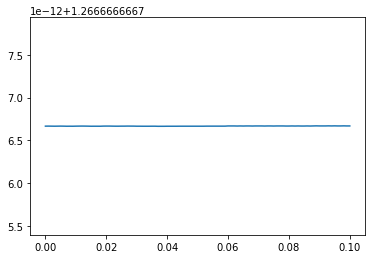

In [288]:
plt.plot(rr, rel_price)

In [315]:
r = 0.025
rhos = np.linspace(-0.95, 0.95, 201)
rel_price = np.zeros(201)
for i, rho in enumerate(rhos):
    rho_matrix = np.array([   
        [1, rho], 
        [rho, 1]
    ])
    weights = get_tangency_portfolio(mu, sigma, rho_matrix, r)
    rel_price[i] = weights[1] - weights[0]

(-5.0, 5.0)

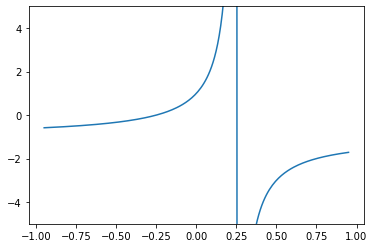

In [316]:
plt.plot(rhos, rel_price)
plt.ylim(-5, 5)

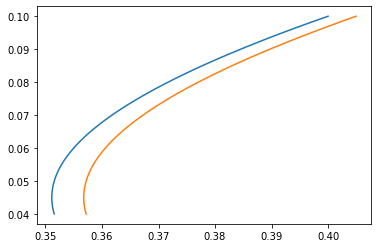

In [324]:
omega = np.linspace(0,1, 101)
mu1 = 0.04
mu2 = 0.1
sigma1 = 0.06
sigma2 = 0.2
rho = 0.3
mu = mu1 * omega + mu2 * (1 - omega)
sigma = np.sqrt((sigma1 ** 2) * omega ** 2 + (sigma2 ** 2) * (1 - omega) ** 2 + 2 * rho * sigma1 * sigma2 * omega.dot(1 - omega))
plt.plot(sigma, mu)
rho = 0.31
sigma = np.sqrt((sigma1 ** 2) * omega ** 2 + (sigma2 ** 2) * (1 - omega) ** 2 + 2 * rho * sigma1 * sigma2 * omega.dot(1 - omega))
plt.plot(sigma, mu)
plt.show()